In [ ]:
pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
### Data Collection
import pandas_datareader as pdr
key=""

In [ ]:
import os

os.environ["TIINGO_API_KEY"] = "4d571506f9066d5402cd04ba5147fa811d8275a8"


In [ ]:
df = pdr.get_data_tiingo('AAPL')

<ipython-input-93-f1b36bf99310>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL')


In [ ]:
df.to_csv("https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1262304000&period2=1620633600&interval=1d&events=history&includeAdjustedClose=true ")


In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1262304000&period2=1620633600&interval=1d&events=history&includeAdjustedClose=true ")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496295,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507524,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404014,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392178,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2851,2021-05-03,132.039993,134.070007,131.830002,132.539993,130.782639,75135100
2852,2021-05-04,131.190002,131.490005,126.699997,127.849998,126.154839,137564700
2853,2021-05-05,129.199997,130.449997,127.970001,128.100006,126.401550,84000900
2854,2021-05-06,127.889999,129.750000,127.129997,129.740005,128.019775,78128300
2855,2021-05-07,130.850006,131.259995,129.479996,130.210007,128.701813,78973300


In [ ]:
df1=df.reset_index()['close']


In [ ]:
df1

array([[0.21137132],
       [0.21400125],
       [0.21004383],
       ...,
       [0.18126487],
       [0.17778334],
       [0.18467126]])

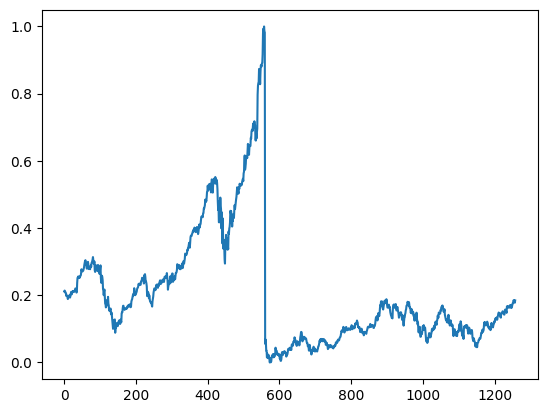

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np


In [ ]:
df1

array([[0.21137132],
       [0.21400125],
       [0.21004383],
       ...,
       [0.18126487],
       [0.17778334],
       [0.18467126]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [ ]:
print(df1)

[[0.21137132]
 [0.21400125]
 [0.21004383]
 ...
 [0.18126487]
 [0.17778334]
 [0.18467126]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [ ]:
training_size,test_size


(817, 441)

In [ ]:
train_data

array([[2.11371321e-01],
       [2.14001252e-01],
       [2.10043832e-01],
       [2.10294302e-01],
       [2.05385097e-01],
       [2.05134627e-01],
       [1.97495304e-01],
       [1.99524108e-01],
       [1.96919224e-01],
       [1.95566688e-01],
       [1.88678773e-01],
       [1.94339386e-01],
       [1.93663118e-01],
       [1.97019411e-01],
       [1.96042580e-01],
       [2.01227301e-01],
       [1.93061991e-01],
       [1.96768942e-01],
       [2.03206011e-01],
       [2.09743269e-01],
       [2.09167188e-01],
       [2.02980589e-01],
       [2.10870382e-01],
       [2.11621791e-01],
       [2.10569818e-01],
       [2.11922354e-01],
       [2.09292423e-01],
       [2.12999374e-01],
       [2.11897307e-01],
       [2.12323106e-01],
       [2.15804634e-01],
       [2.20363181e-01],
       [2.18835316e-01],
       [2.10745147e-01],
       [2.08065122e-01],
       [2.09016907e-01],
       [2.37094552e-01],
       [2.51847214e-01],
       [2.53350031e-01],
       [2.56055103e-01],


In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 290ms/step - loss: 0.0372 - val_loss: 6.3702e-04
Epoch 2/100
12/12 [==============================] - 3s 279ms/step - loss: 0.0144 - val_loss: 0.0052
Epoch 3/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0123 - val_loss: 4.3296e-04
Epoch 4/100
12/12 [==============================] - 2s 190ms/step - loss: 0.0096 - val_loss: 5.2331e-04
Epoch 5/100
12/12 [==============================] - 2s 186ms/step - loss: 0.0085 - val_loss: 0.0012
Epoch 6/100
12/12 [==============================] - 2s 212ms/step - loss: 0.0080 - val_loss: 4.4378e-04
Epoch 7/100
12/12 [==============================] - 3s 289ms/step - loss: 0.0074 - val_loss: 0.0012
Epoch 8/100
12/12 [==============================] - 2s 186ms/step - loss: 0.0066 - val_loss: 3.3273e-04
Epoch 9/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0074 - val_loss: 0.0015
Epoch 10/100
12/12 [==============================] - 2s 192ms/step - l

In [ ]:
import tensorflow as tf


In [ ]:
tf.__version__

'2.12.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

29/29 [==============================] - 1s 43ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


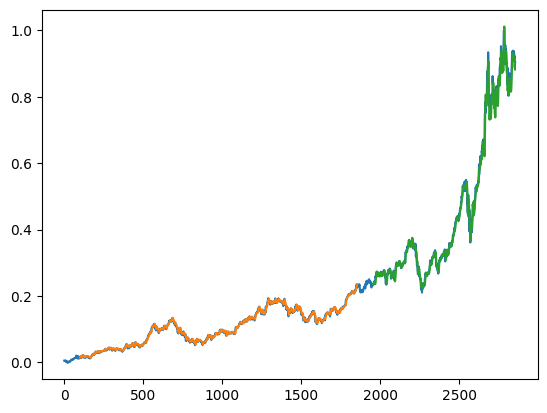

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

1000

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [ ]:
temp_input

[0.35396691478772274,
 0.3622757193954634,
 0.363724732178378,
 0.36651266323468107,
 0.37021770371216817,
 0.37533506613942713,
 0.36785162552826534,
 0.3610651566761305,
 0.3601114077786988,
 0.3657973350540339,
 0.3465201650097038,
 0.34301688376265566,
 0.35706667023719374,
 0.34835433983187597,
 0.35714002255668204,
 0.3553792367374946,
 0.3458965529068645,
 0.3519309733984124,
 0.35438876032342376,
 0.3582038512902412,
 0.3441907556488458,
 0.3528297337346753,
 0.3464101218570727,
 0.33896337207905375,
 0.3409075973905562,
 0.3511056020651342,
 0.35726842946763265,
 0.33023268525211563,
 0.3194293955495216,
 0.3234279113352555,
 0.3347630970628809,
 0.3320852164959081,
 0.3247118263740767,
 0.3058198257057034,
 0.30226151921399014,
 0.29230196460299385,
 0.3007575105332075,
 0.3046459538195132,
 0.29057783293345274,
 0.2742903531758646,
 0.27392352554812943,
 0.26568806592317784,
 0.26996170059553826,
 0.2692647288365114,
 0.2815537001450649,
 0.2790041971422456,
 0.2772250402280

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
 
 

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
len(df1)

2856

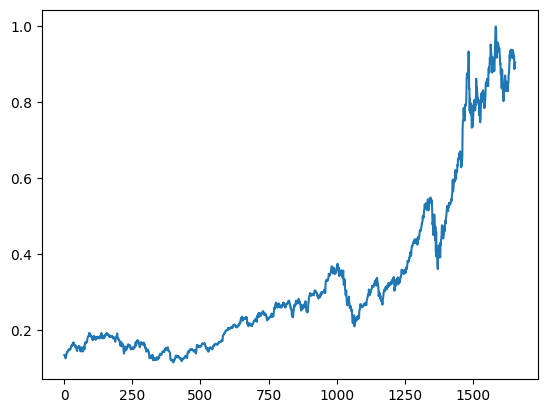

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()


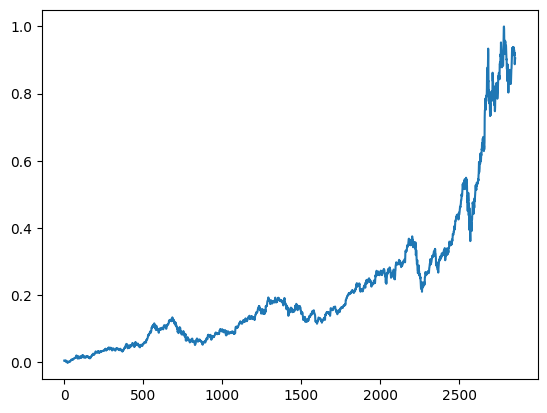

In [ ]:
plt.plot(df3)